# Testing Notebook
This notebook reproduces the results from my submission by compactly loading in weights and relevant data. The folder `test_data` contains only the necessary images/labels for testing on a small subset of the dataset.

In [1]:
# Only run if you need to install these libraries! (you probably don't)
%pip install torch, torchvision
%pip install PIL
%pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'torch,'
You should consider upgrading via the 'C:\Users\mlisi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
You should consider upgrading via the 'C:\Users\mlisi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
You should consider upgrading via the 'C:\Users\mlisi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [1]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
def config_plot(ax):
    '''
    Function to remove axis tickers and box around figure
    '''

    ax.axis('off')

    # Remove axis spines
    for spine in ax.spines.values():
        spine.set_visible(False)

## Loading the Data

We define a custom `Dataset` object specifically for loading in this subset of the data.

In [4]:
class TestDataset(Dataset):
    def __init__(self, rgb_directory, nir_directory, label_directory, transform=transforms.ToTensor()):
        
        self.rgb_directory = rgb_directory
        self.nir_directory = nir_directory
        self.label_directory = label_directory
        
        self.rgb_files = [file for file in os.listdir(rgb_directory)]
        self.nir_files = [file for file in os.listdir(nir_directory)]
        self.label_files = [file for file in os.listdir(label_directory)]

        self.transform = transform

    def __len__(self):
        return len(self.label_files)

    def __getitem__(self, idx):
        rgb_path = os.path.join(self.rgb_directory, self.rgb_files[idx])
        rgb = Image.open(rgb_path).convert('RGB')

        nir_path = os.path.join(self.nir_directory, self.nir_files[idx])
        nir = Image.open(nir_path)
        
        label_path = os.path.join(self.label_directory, self.label_files[idx])
        label = Image.open(label_path)

        if self.transform:
            rgb = self.transform(rgb)
            nir = self.transform(nir)
            label = self.transform(label)

        image = torch.cat((rgb, nir), dim=0)
        
        return image, label

test_dataset = TestDataset('ml_test_rgbs/', 'ml_test_nirs/', 'ml_test_labels/')
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

## Loading the Model

We define our UNet and load in the weights.

In [5]:
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, out_channels, kernel_size=3, padding=1),
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.decoder(x1)
        return x2

in_channels = 4 # 3 for RGB + 1 for NIR
out_channels = 2 # Number of classes for single-class segmentation
model = UNet(in_channels, out_channels)
state_dict = torch.load('v2_nir_water_checkpoint_1_epochs')['state_dict']
model.load_state_dict(state_dict)

<All keys matched successfully>

## Testing Model & Plotting Results

We use a batch size of 1 for plotting convenience - feel free to kill the cell once you've seen enough! 

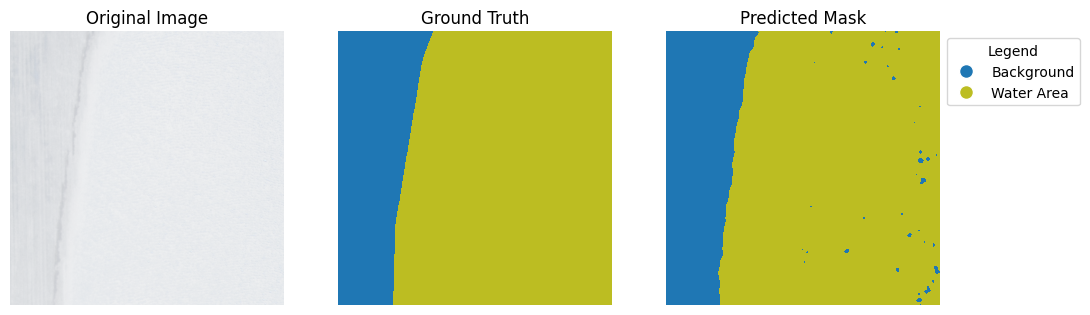

Loss: 0.6117748618125916


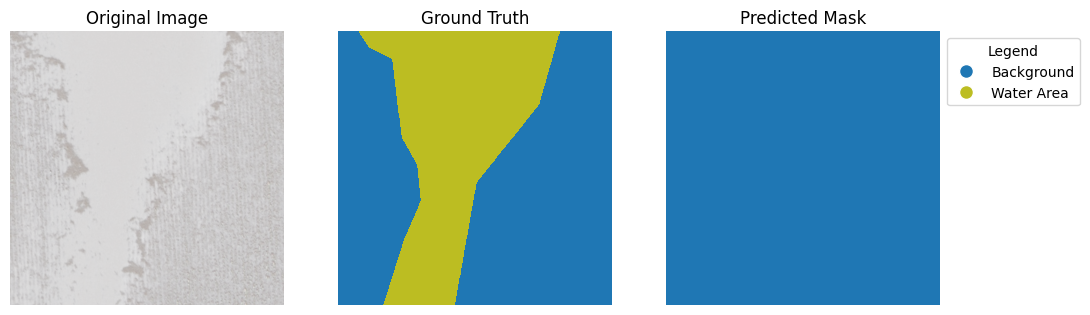

Loss: 0.5309868454933167


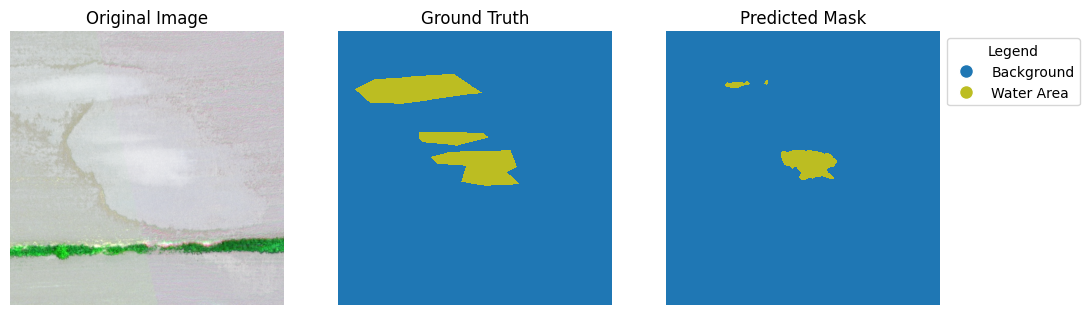

Loss: 0.10156946629285812


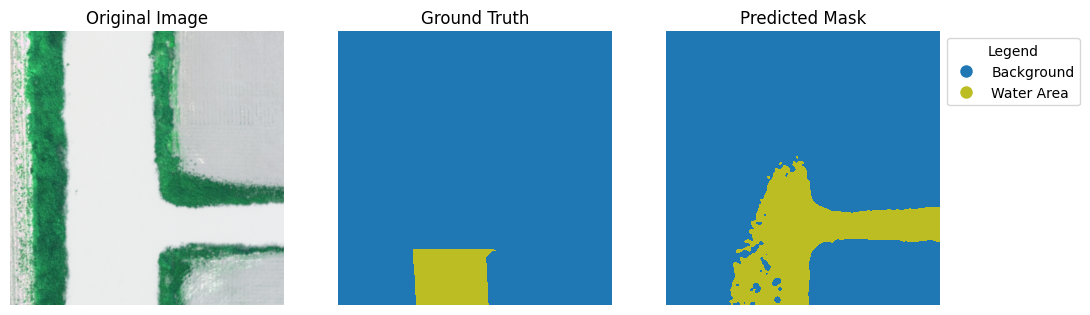

Loss: 0.2767617702484131


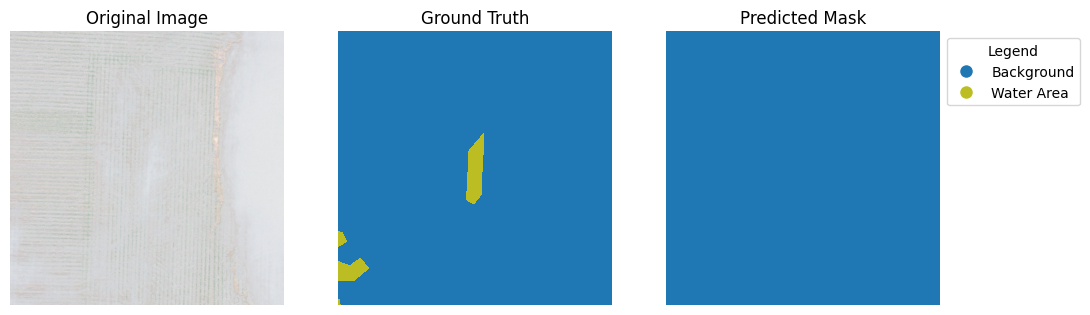

Loss: 0.18837976455688477


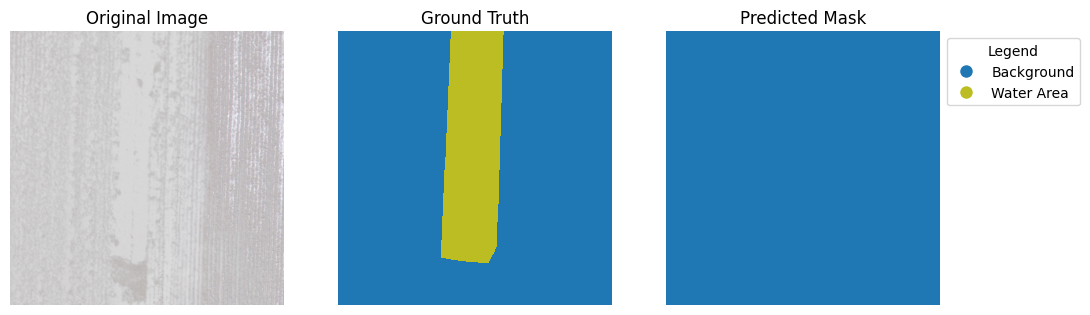

Loss: 0.37972038984298706


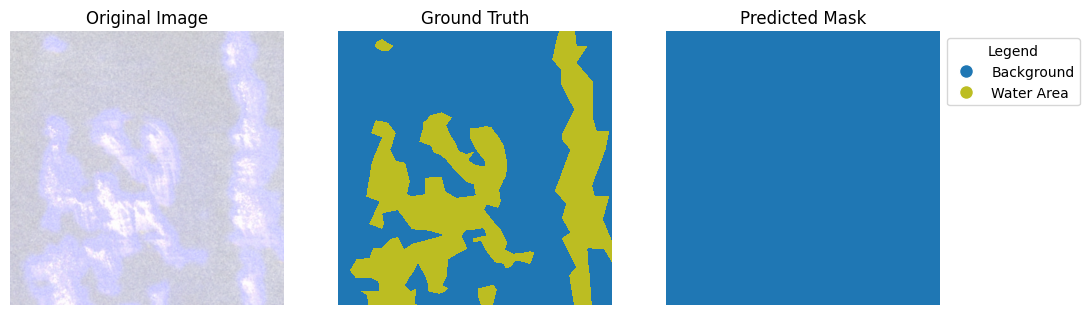

Loss: 1.0674299001693726


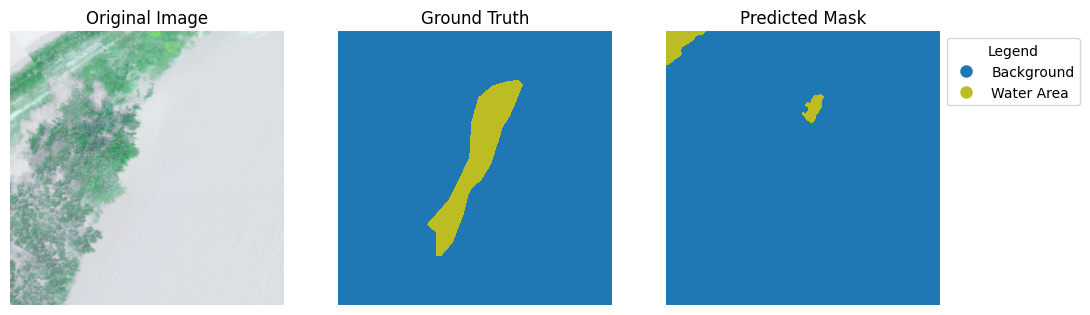

Loss: 0.31992781162261963


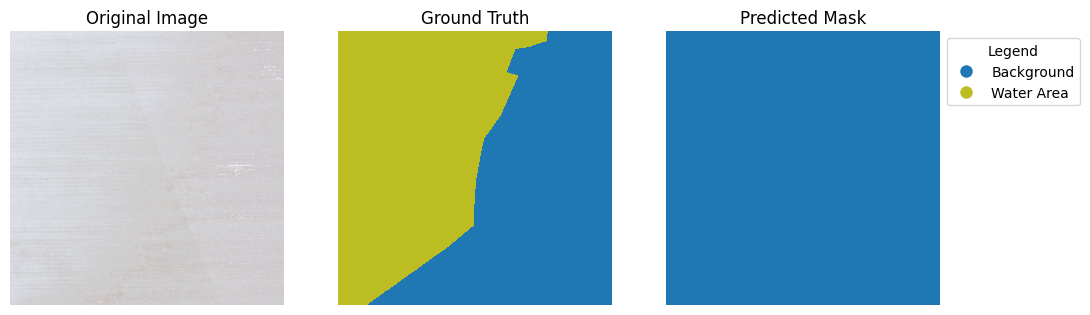

Loss: 0.7872899174690247


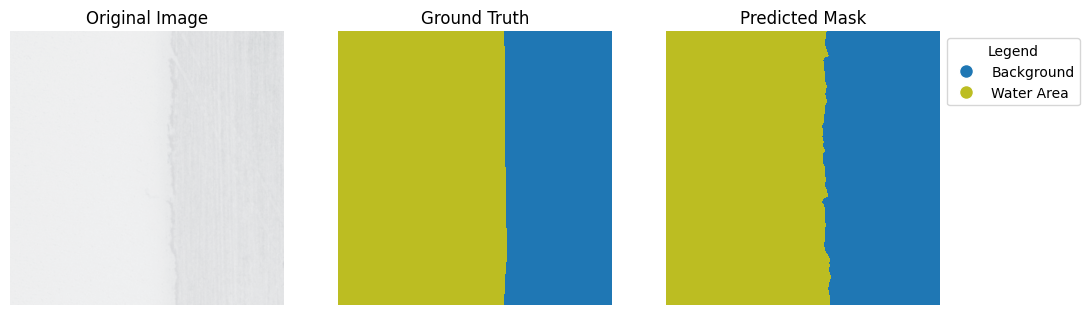

Loss: 0.6235291361808777


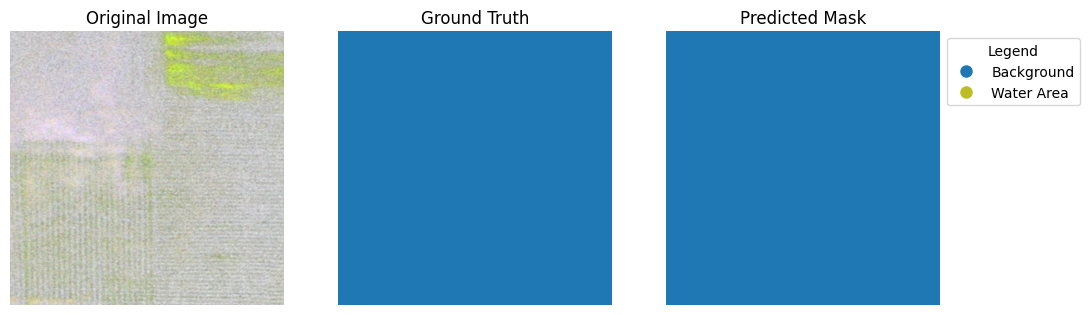

Loss: 0.006133371964097023


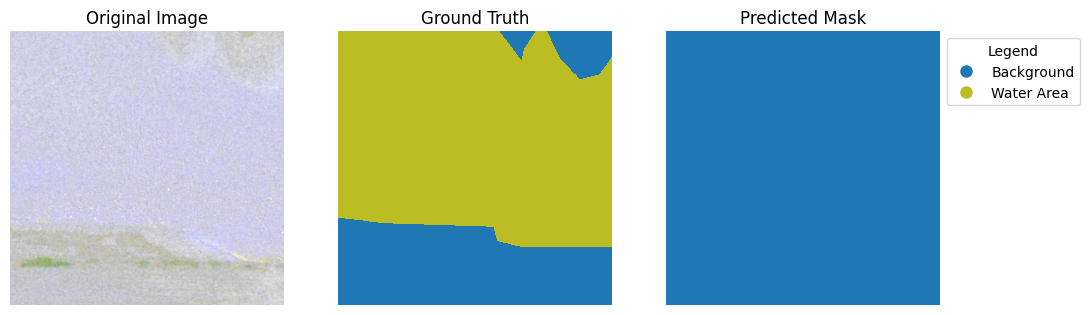

Loss: 2.319632053375244


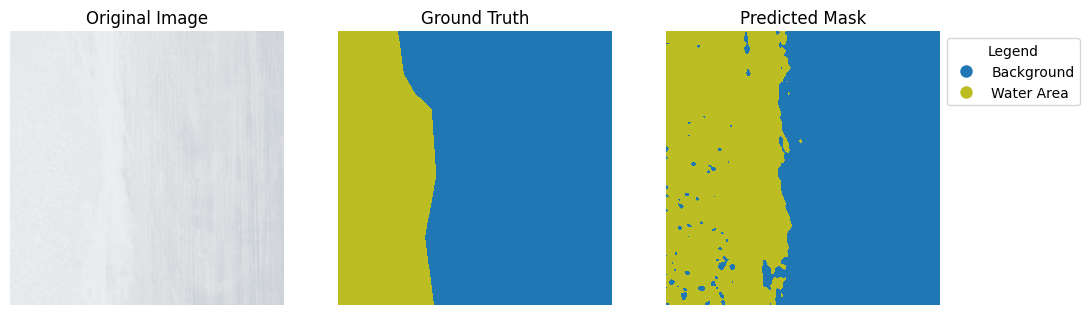

Loss: 0.5795069336891174


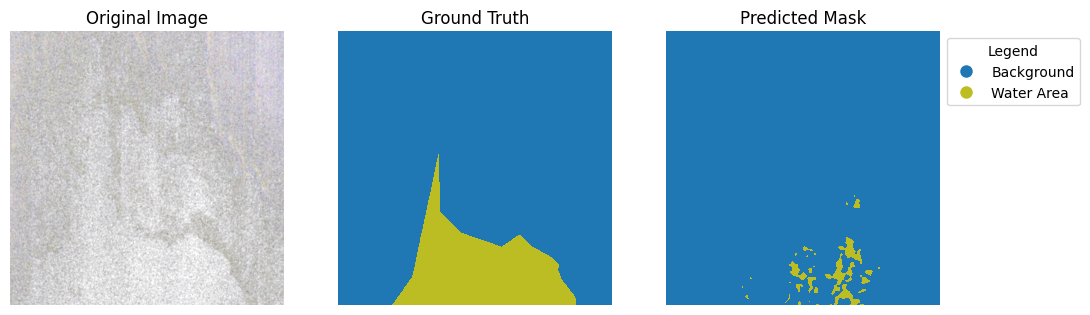

Loss: 0.1998485028743744


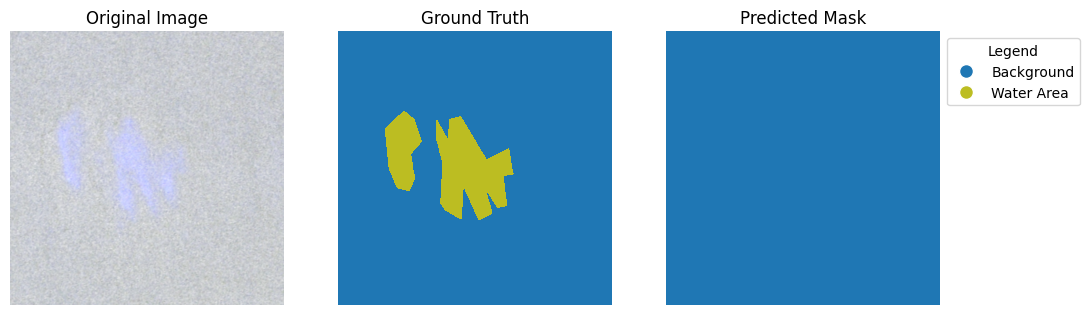

Loss: 0.3005010187625885


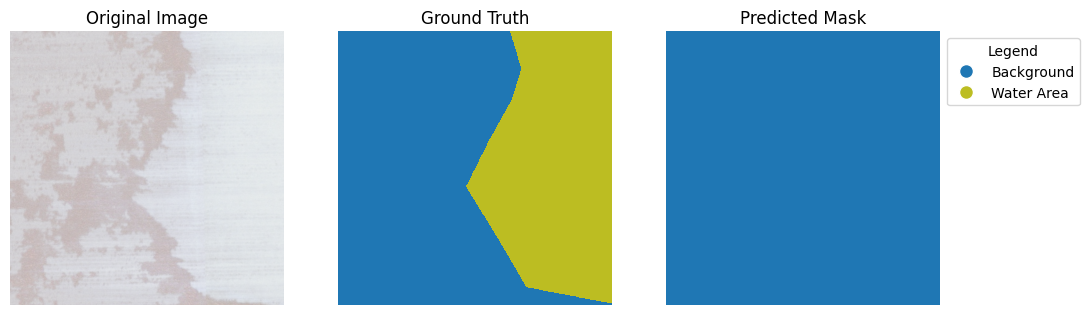

Loss: 0.4329347610473633


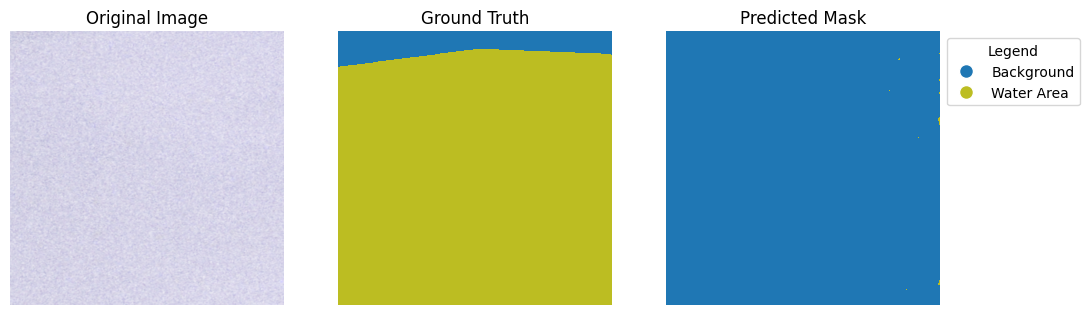

Loss: 0.8571699857711792


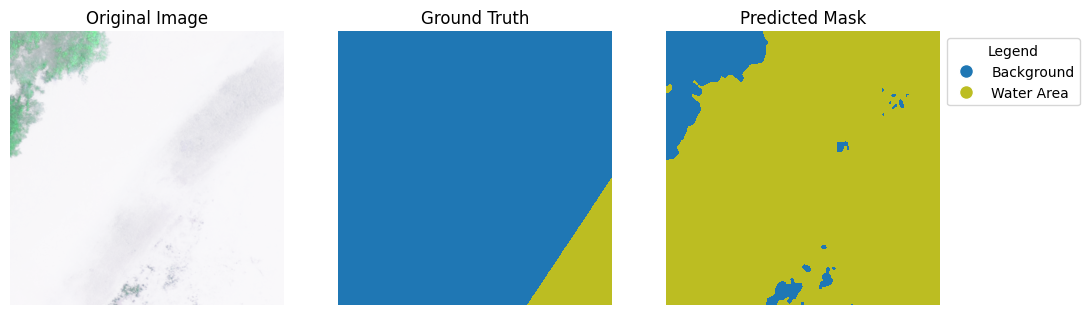

Loss: 0.7584601044654846


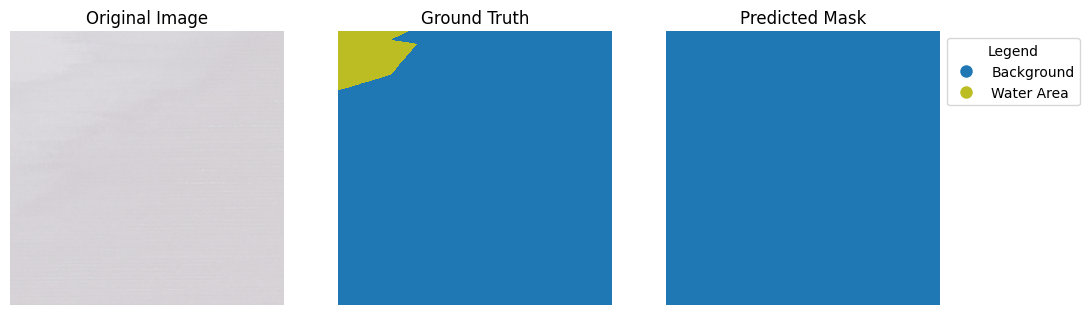

Loss: 0.2310023456811905


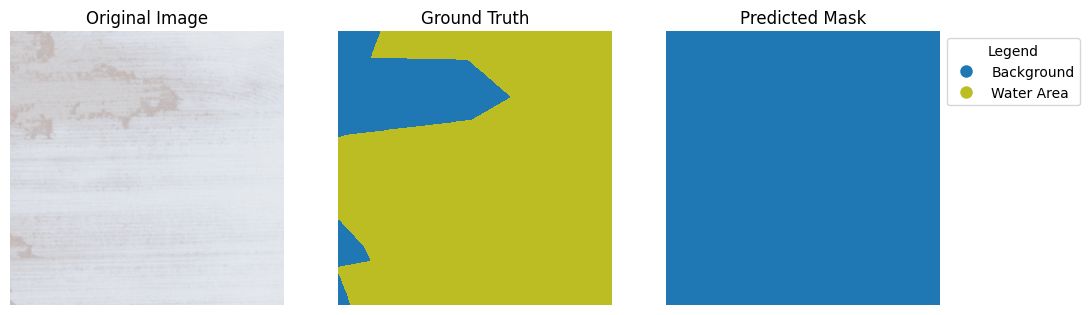

Loss: 0.8760767579078674


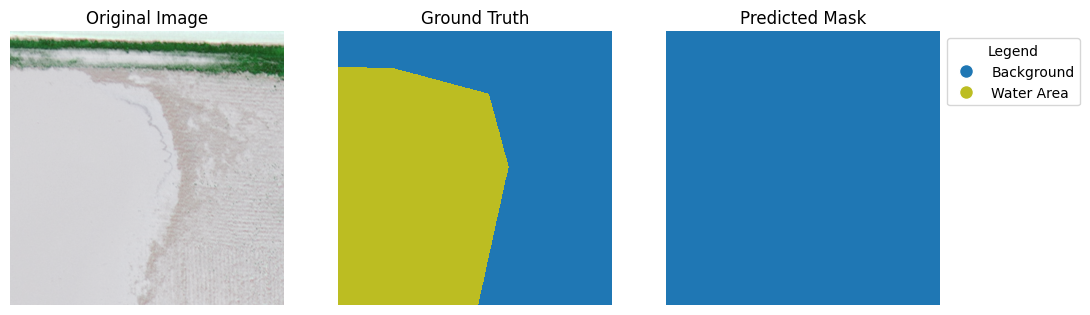

Loss: 0.9193524718284607


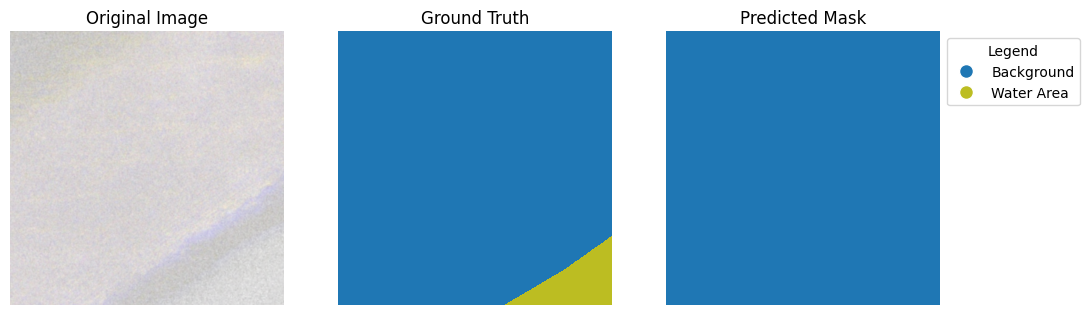

Loss: 0.06611653417348862


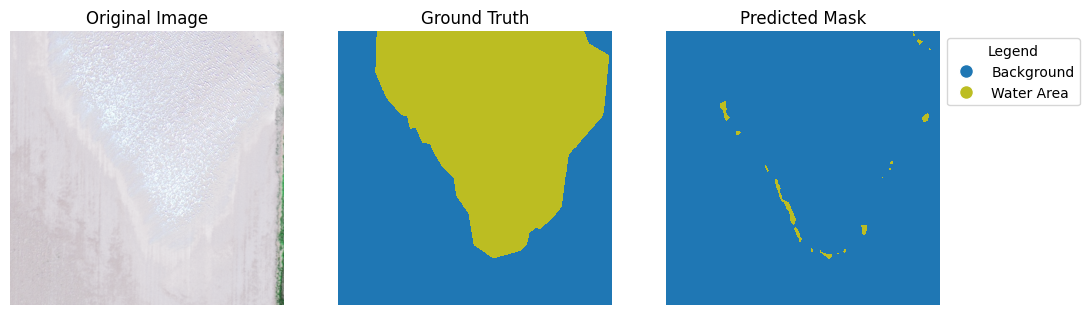

Loss: 1.4684438705444336


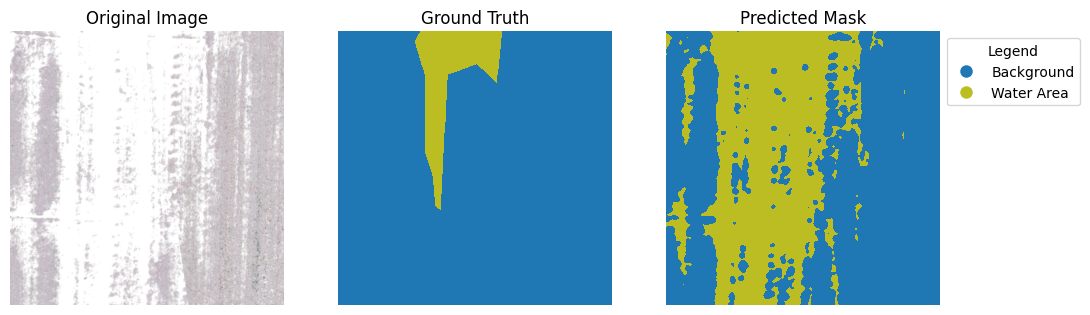

Loss: 0.38825511932373047


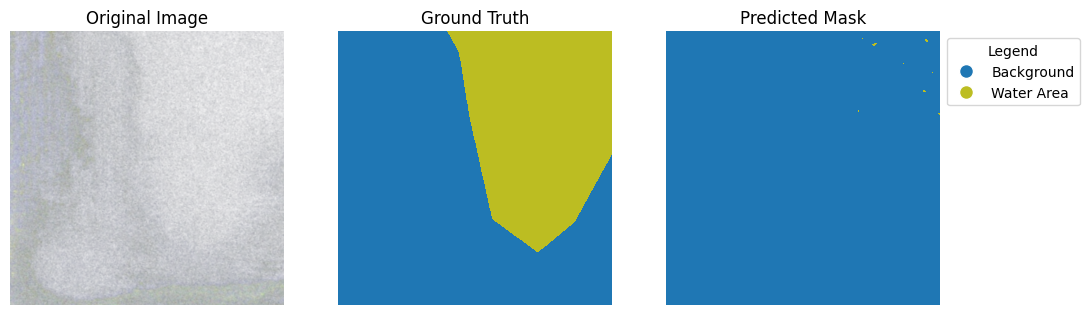

Loss: 0.4550231099128723


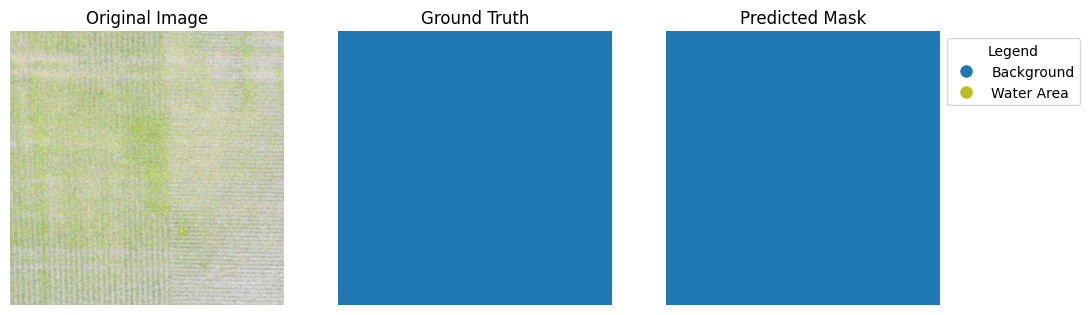

Loss: 0.0008859571535140276


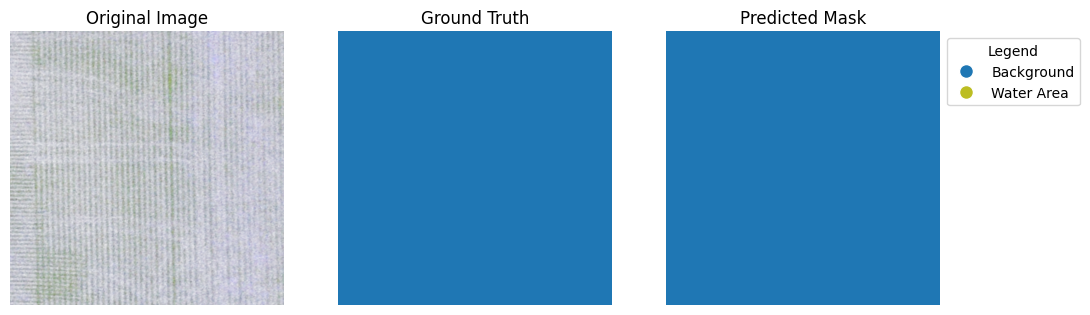

Loss: 0.02354426123201847


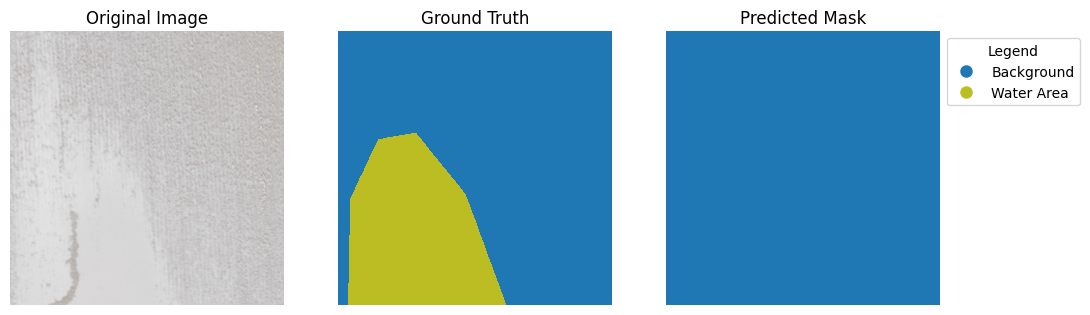

Loss: 0.4036179482936859


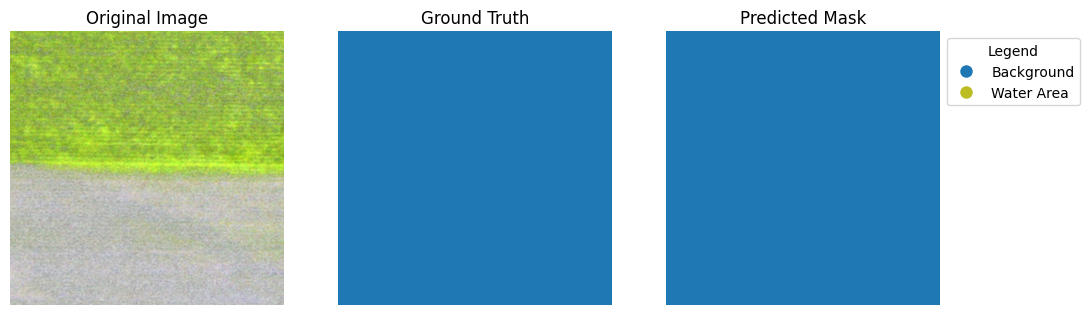

Loss: 0.00031531465356238186


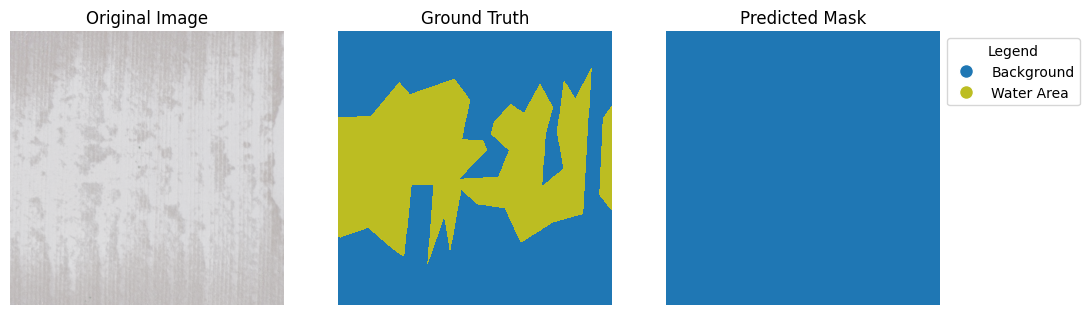

Loss: 0.6603350043296814


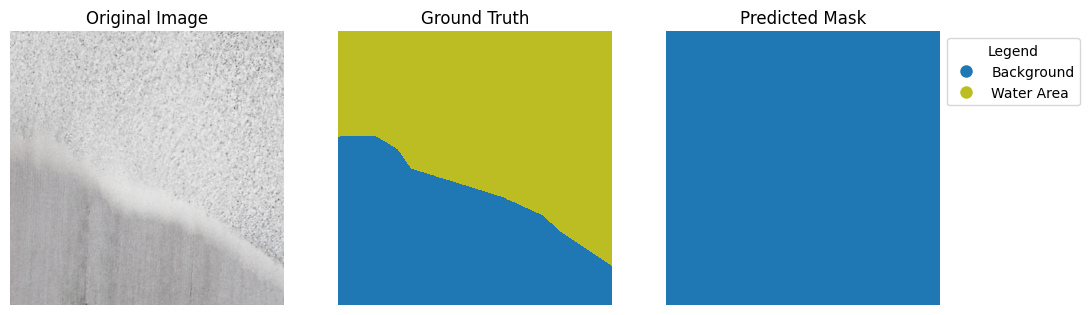

Loss: 1.7419157028198242


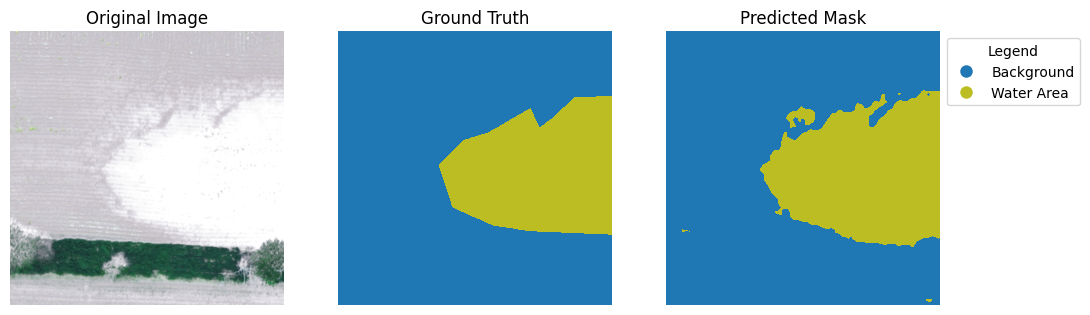

Loss: 0.20848186314105988


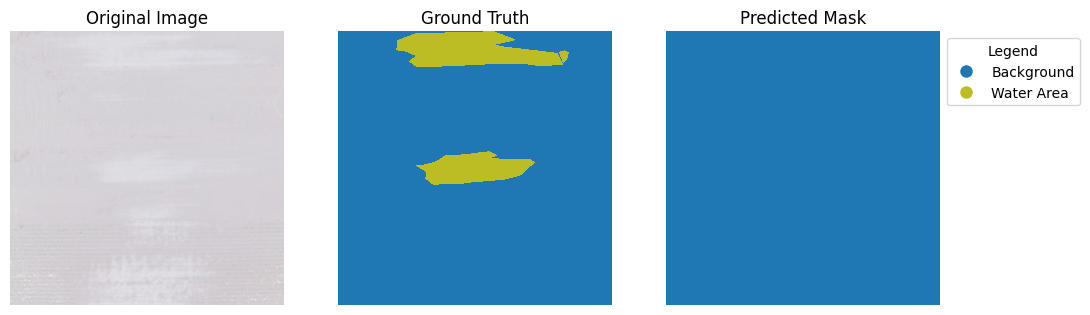

Loss: 0.2894507646560669


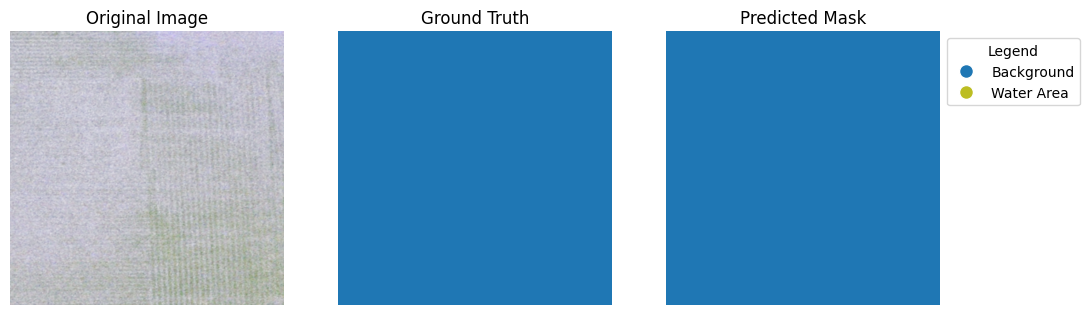

Loss: 0.014067414216697216


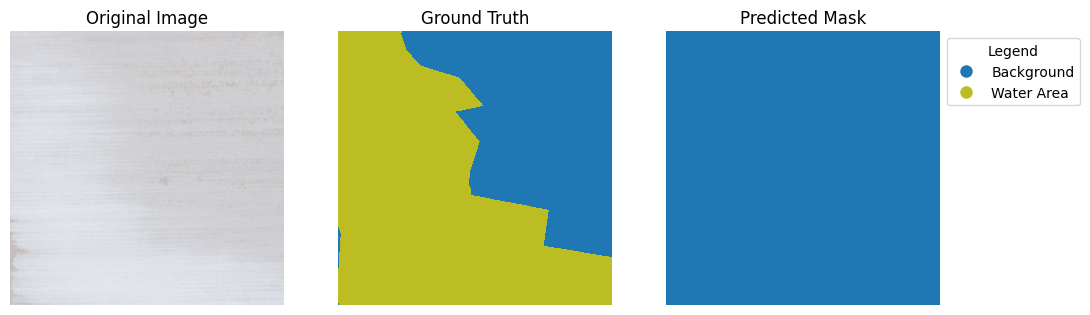

Loss: 0.7251526117324829


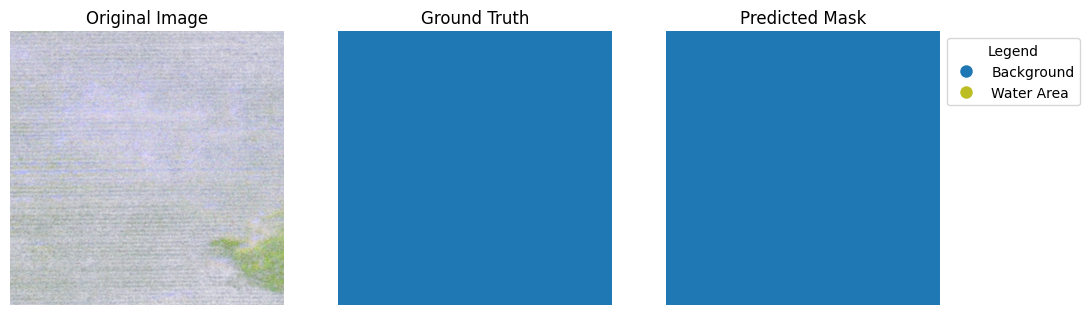

Loss: 0.011725835502147675


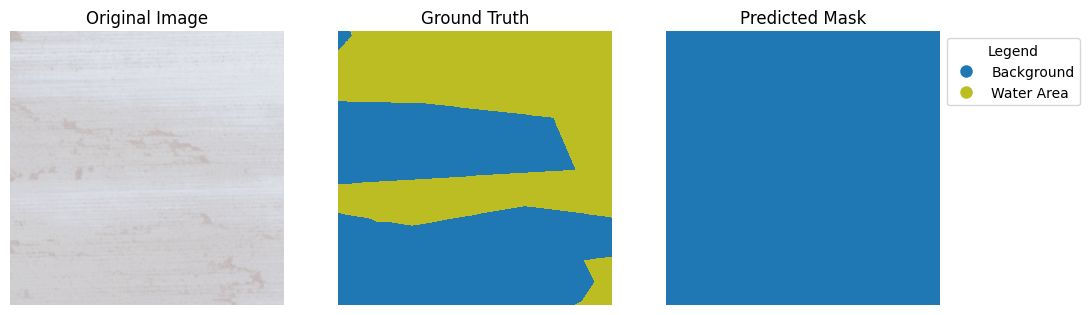

Loss: 0.6274663805961609


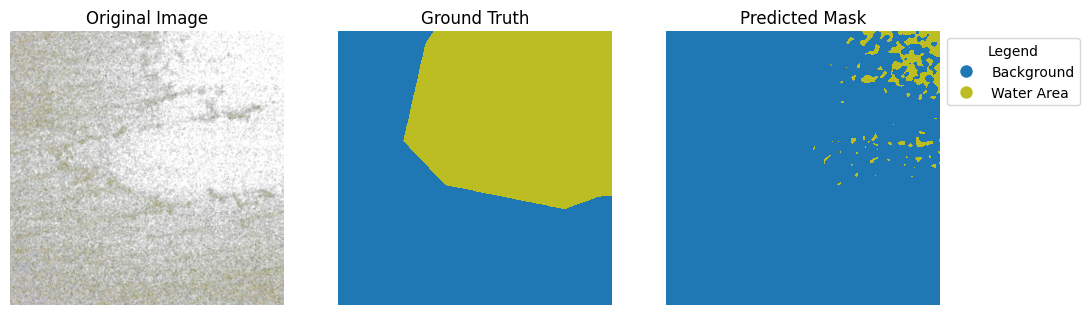

Loss: 0.711968719959259


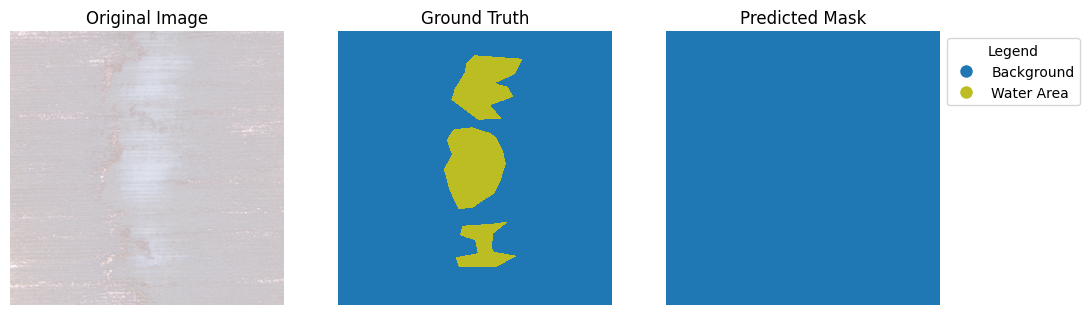

Loss: 0.2168464958667755


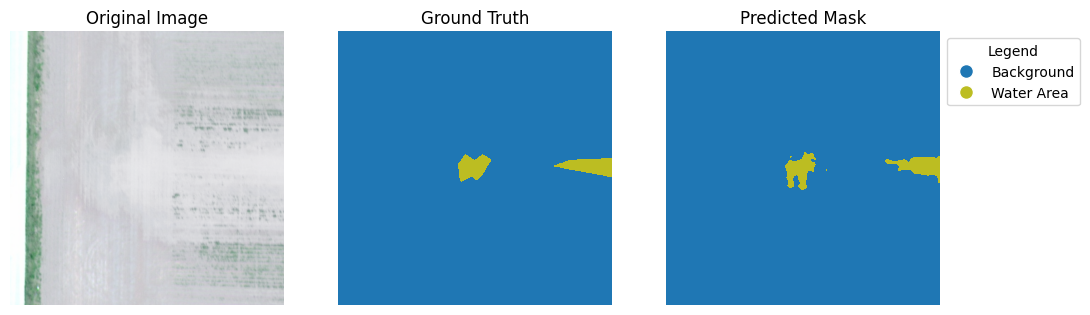

Loss: 0.12701515853405


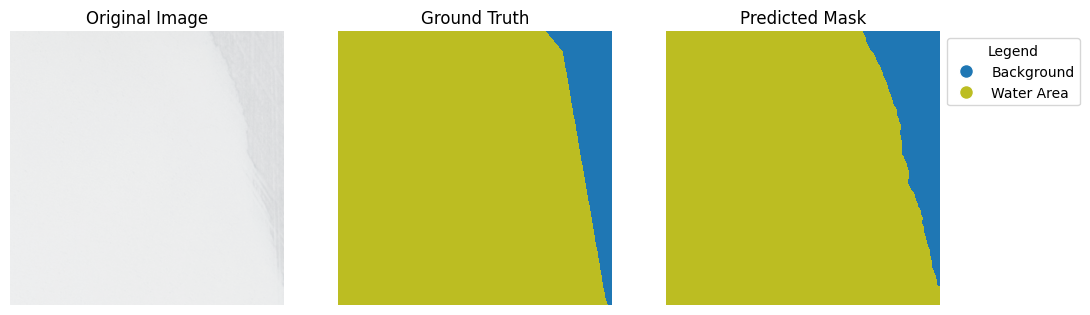

Loss: 0.614935576915741


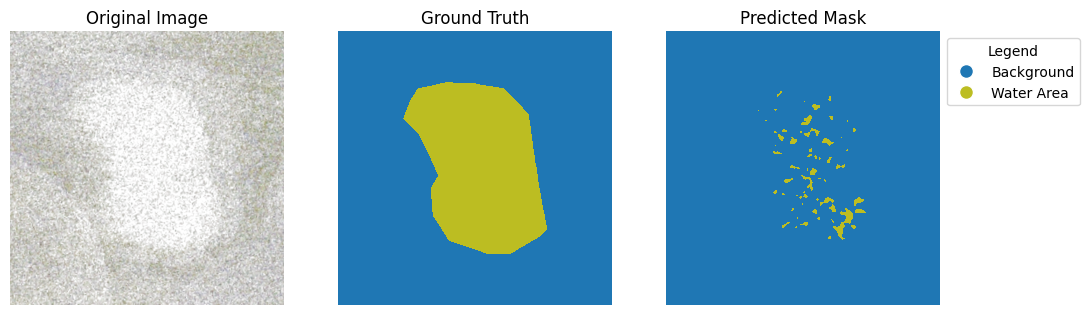

Loss: 0.2675708532333374


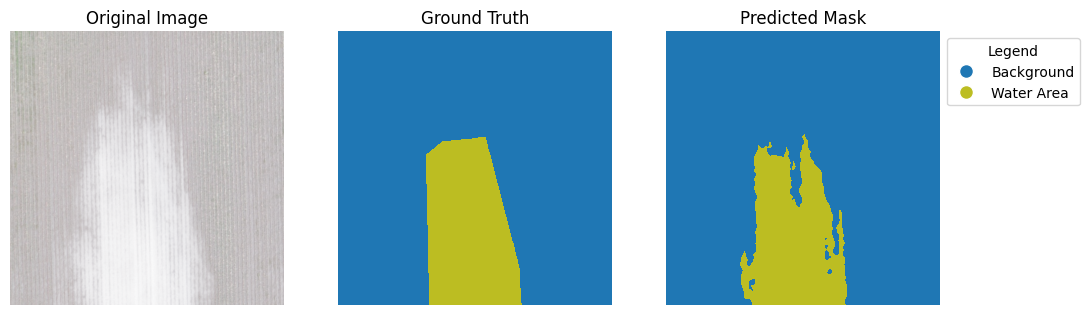

Loss: 0.15459303557872772


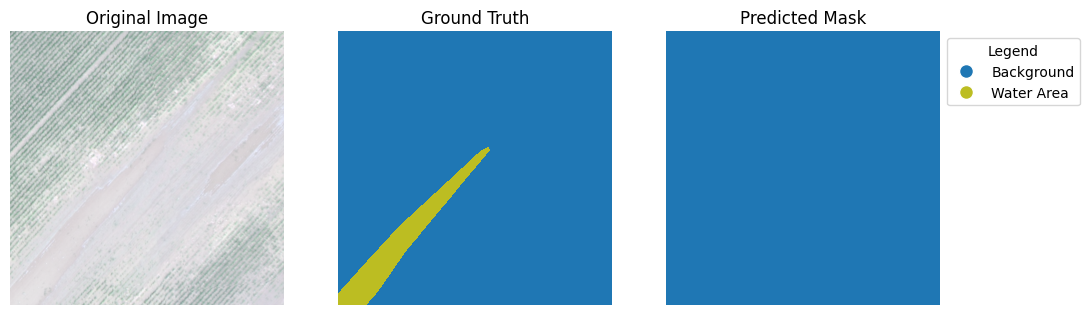

Loss: 0.07757832109928131


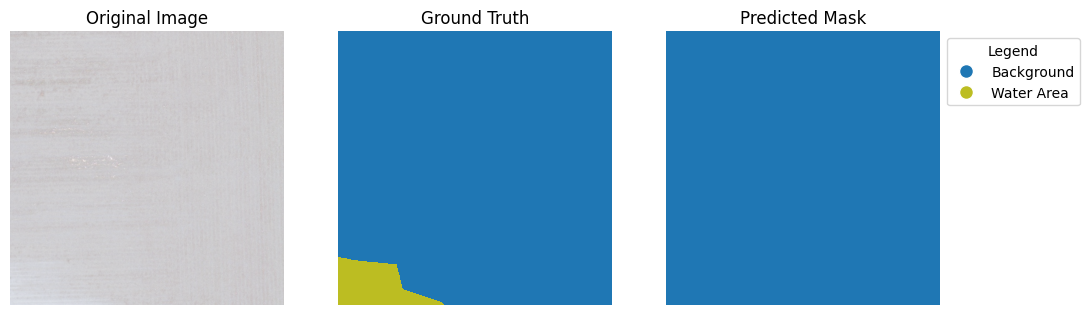

Loss: 0.1062726378440857


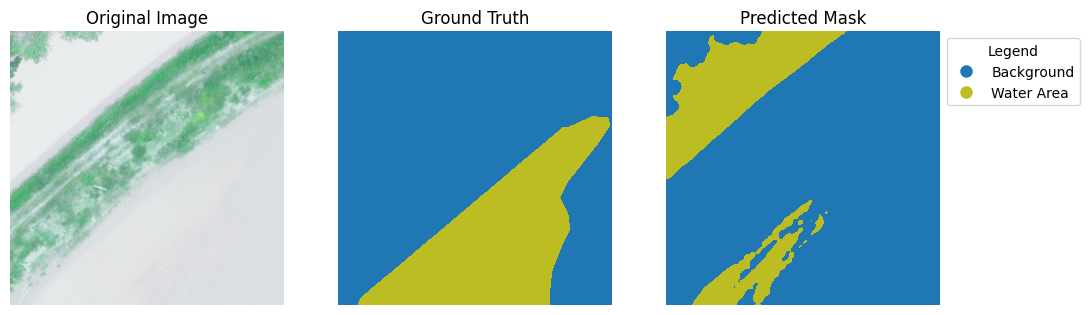

Loss: 0.396940678358078


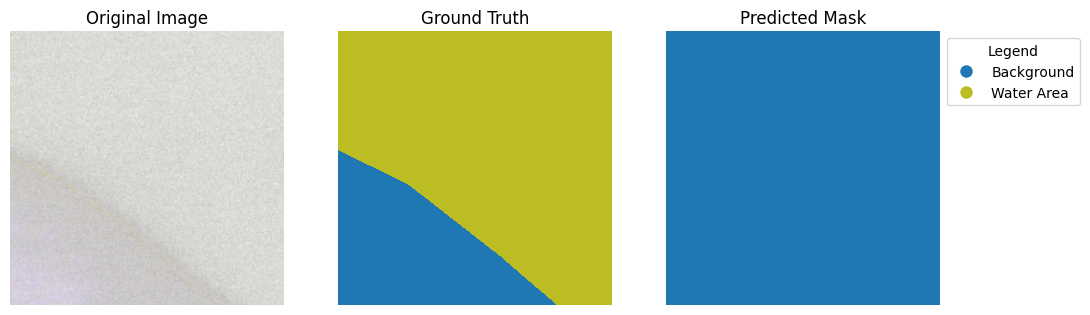

Loss: 1.3920702934265137


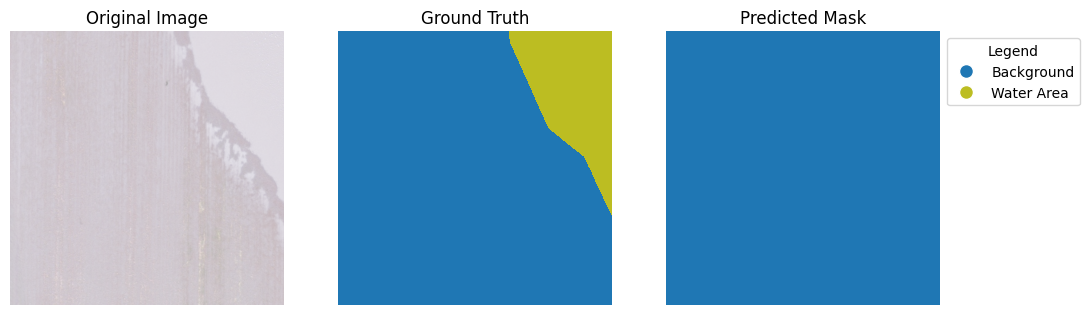

Loss: 0.20939108729362488


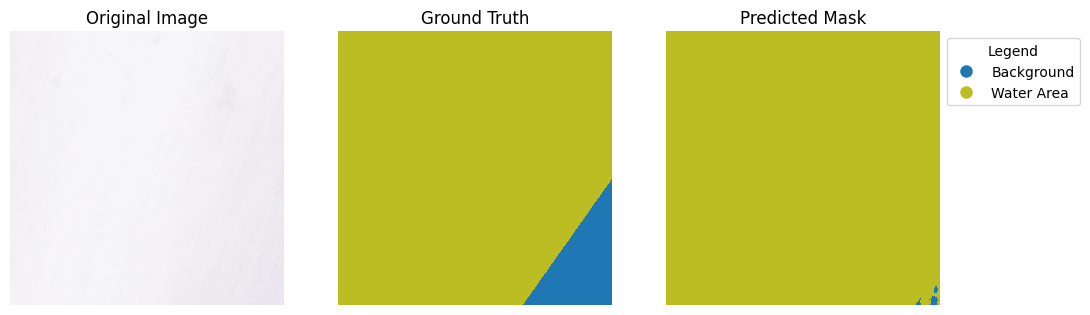

Loss: 0.5741168260574341


KeyboardInterrupt: 

In [6]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
from matplotlib.colors import ListedColormap

# Define custom colors for each class
custom_colors = ['#1f77b4', '#bcbd22']

# Create a new colormap with custom colors
custom_cmap = ListedColormap(custom_colors, name='custom_colormap')

criterion = nn.CrossEntropyLoss()

model.eval()
model.cpu()
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = model(inputs)
        labels = labels.long()
        
        # Convert output to probabilities and get the predicted class
        _, predicted = torch.max(outputs, 1)
    
        
        idx = 0
        #for i in range(16):
        #    if torch.max(predicted[i]) != 0:
        #        idx = i
        #        break
        # Display the original image, ground truth, and predicted segmentation mask
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
        # Original image
        axes[0].imshow(F.to_pil_image(inputs[idx]))  # Assuming batch_size=1
        axes[0].set_title('Original Image')
        config_plot(axes[0])
        
        # Ground truth label
        axes[1].imshow(labels[idx].squeeze(0), cmap=custom_cmap, vmin=0, vmax=1)  # Assuming single-channel labels
        axes[1].set_title('Ground Truth')
        config_plot(axes[1])
        
        # Predicted segmentation mask
        axes[2].imshow(predicted[idx].squeeze(0), cmap=custom_cmap, vmin=0, vmax=1)  # Adjust cmap as needed
        axes[2].set_title('Predicted Mask')
    
    
        legend_labels = ['Background', 'Water Area']
        plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                    for color, label in zip(custom_colors, legend_labels)],
        title='Legend', loc='upper left', bbox_to_anchor=(1, 1))
        
        config_plot(axes[2])
        plt.show()
        print("Loss:" , criterion(outputs, labels.squeeze(1)).item())
